In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from scipy import interpolate

from os import walk

#path1 = '../../../data/2018_01_10/'
path1 = '../../../data/2018_01_12/'

In [2]:
f = [] # empty list of files
for (dirpath, dirnames, filenames) in walk(path1):
    f.extend(filenames)

# sort list alphabetically
f.sort()
# remove non .tsv files from list
f = [x for x in f if x[-4:]==".tsv"]

In [3]:
# get length of filename list
f_len = len(f)

# exclude/add file section
for ii in range(f_len):
    print(ii, f[ii])
    
f = [f[1], f[3], f[6], f[8], f[10], f[12], f[15], f[17], f[20], f[23]]
f_len = len(f)

print()
for ii in range(f_len):
    print(ii, f[ii])

0 1558-VOA_sweep_full304.tsv
1 1603-VOA_sweep_up302.tsv
2 1604-VOA_sweep_full300.tsv
3 1609-VOA_sweep_down299.tsv
4 1611-VOA_sweep_full297.tsv
5 1617-VOA_sweep_full273.tsv
6 1622-VOA_sweep_up271.tsv
7 1623-VOA_sweep_full270.tsv
8 1629-VOA_sweep_down269.tsv
9 1636-VOA_sweep_full249.tsv
10 1640-VOA_sweep_up247.tsv
11 1641-VOA_sweep_full246.tsv
12 1645-VOA_sweep_down246.tsv
13 1647-VOA_sweep_full244.tsv
14 1648-VOA_sweep_full226.tsv
15 1658-VOA_sweep_up224.tsv
16 1700-VOA_sweep_full221.tsv
17 1704-VOA_sweep_down220.tsv
18 1705-VOA_sweep_full219.tsv
19 1707-VOA_sweep_full200.tsv
20 1710-VOA_sweep_up199.tsv
21 1711-VOA_sweep_full199.tsv
22 1716-VOA_sweep_full197.tsv
23 1724-VOA_sweep_down195.tsv
24 1725-VOA_sweep_full194.tsv
25 BAD_1715-VOA_sweep_down198.tsv

0 1603-VOA_sweep_up302.tsv
1 1609-VOA_sweep_down299.tsv
2 1622-VOA_sweep_up271.tsv
3 1629-VOA_sweep_down269.tsv
4 1640-VOA_sweep_up247.tsv
5 1645-VOA_sweep_down246.tsv
6 1658-VOA_sweep_up224.tsv
7 1704-VOA_sweep_down220.tsv
8 1710-VOA_

In [4]:
d1 = {} # empty data dictionary

for ff in range(f_len):
    temp = np.loadtxt(path1+f[ff])[0:2,:].reshape(6).tolist()
    temp[3:] = np.int_(temp[3:]) # convert to integer
    temp.append(temp[1]<temp[2]) # append direction_up value
    d1[ff] = ( temp, np.loadtxt(path1+f[ff])[2:,:] )
    del temp
    
print('data shapes:')
for ii, dd in d1.items():
    print(dd[1][:,:].shape, '-->\t %d loops, %d samples per loop' %(dd[1][:,:].shape[0]/dd[0][4],dd[0][4]))
    print('\t\t',dd[0])

k = 0.2
print('\nnormalization constant k = %.1f'%k)

data shapes:
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.302, 0.47, 0.52, 20, 21, 100, True]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.299, 0.36, 0.32, 20, 21, 100, False]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.271, 0.44, 0.49, 20, 21, 100, True]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.269, 0.36, 0.31, 20, 21, 100, False]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.247, 0.42, 0.47, 20, 21, 100, True]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.246, 0.36, 0.31, 20, 21, 100, False]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.224, 0.39, 0.44, 20, 21, 100, True]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.22, 0.35, 0.3, 20, 21, 100, False]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.199, 0.37, 0.42, 20, 21, 100, True]
(420, 3) -->	 20 loops, 21 samples per loop
		 [1552.195, 0.36, 0.31, 20, 21, 100, False]

normalization constant k = 0.2


In [5]:
# define settings for plots
colors = (('xkcd:orange', 'xkcd:red'),#
          ('xkcd:blue', 'xkcd:purple'),#
          ('xkcd:green', 'xkcd:lime'),#
         )

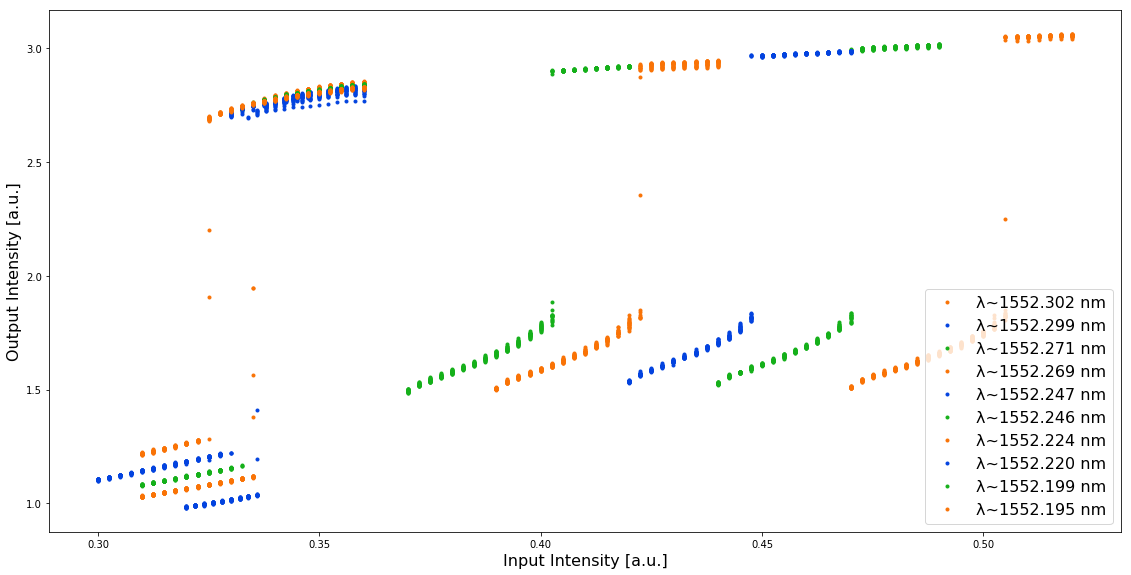

In [6]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii, dd in d1.items():
    ax1.plot( dd[1][:,0], dd[1][:,1], label='λ~%.3f nm'%dd[0][0],#
              ls='', marker='.', c=colors[ii%3][0])

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

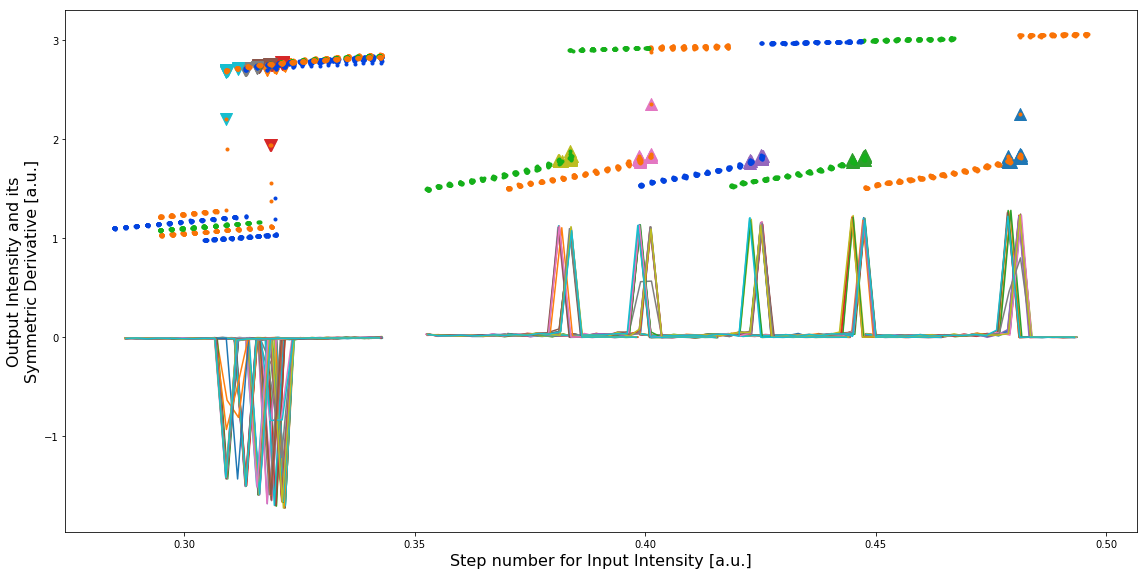

In [7]:
## What do I need loop_stat() function to do? Let's find out!
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii, dd in d1.items():
    cc = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    datax = dd[1][:,0] / dd[1][:,2] * k # here goes the power correction/normalization!
    datay = dd[1][:,1]
    
    # ----
        
    tempx = np.transpose( datax.reshape(dd[0][3], dd[0][4]) )
    tempy = np.transpose( datay.reshape(dd[0][3], dd[0][4]) )
    
    ax1.plot( tempx, tempy, label='λ~%.3f nm'%dd[0][0],#
              ls='', marker='.', c=colors[ii%3][0])
    
    #ax1.plot( tempx, np.gradient(tempy, axis=0))
    ax1.plot( tempx[:-1], np.diff(tempy, axis=0) )
    
    if dd[0][6]:
        idx1 = np.argmax( np.diff(tempy, axis=0), axis=0)
        ax1.scatter(tempx[idx1, range(dd[0][3])], tempy[idx1, range(dd[0][3])], marker='^', s=12**2)
    else:
        idx2 = np.argmin( np.diff(tempy, axis=0), axis=0)
        ax1.scatter(tempx[idx2, range(dd[0][3])], tempy[idx2, range(dd[0][3])], marker='v', s=12**2)

ax1.set_xlabel('Step number for Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)

plt.show()
plt.close()

In [8]:
def loop_stat(datax, datay, loops, ppl, up_direction = True):
    # transform data in more suitable shape
    mdatax = np.transpose( datax.reshape(loops, ppl) )
    mdatay = np.transpose( datay.reshape(loops, ppl) )
    
    # calculare finite difference, or gradient
    #dif_datay = np.gradient(mdatay, axis=0)
    dif_datay = np.diff(mdatay, axis=0)
    
    # find maxima and minima, i.e. upper and lower bistability limits
    if up_direction:
        indexes = np.argmax(dif_datay, axis=0)
    else:
        indexes = np.argmin(dif_datay, axis=0)
    
    # return reshaped data (1,2) and bistability limits (3)
    return (mdatax, mdatay, indexes)

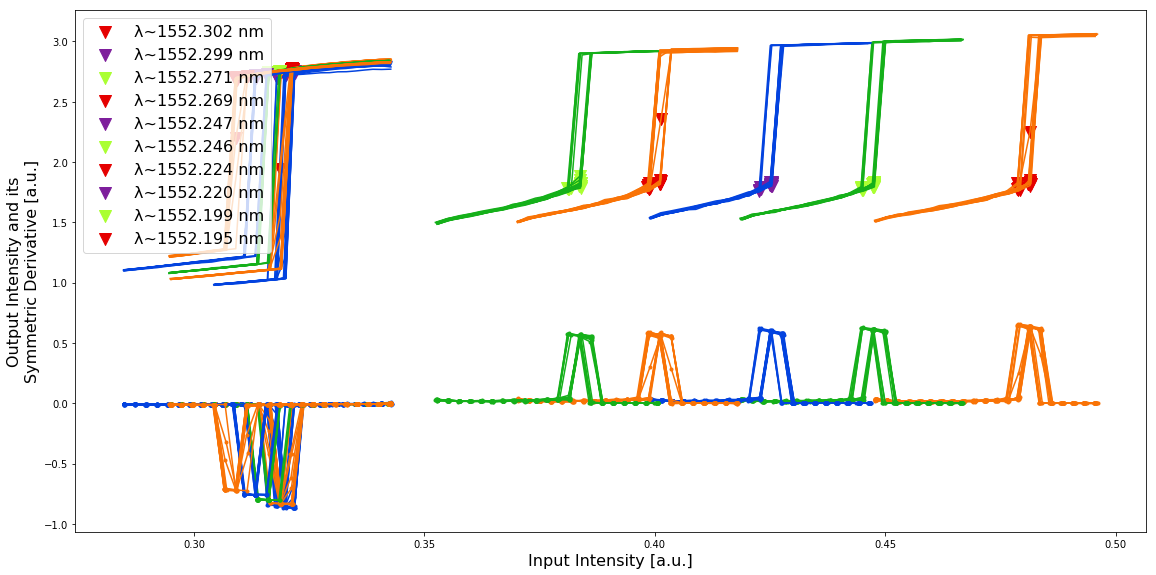

In [9]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

t1 = {}

for ii, dd in d1.items():
    t1[ii] = loop_stat( dd[1][:dd[0][3]*2*dd[0][4],0] / dd[1][:dd[0][3]*2*dd[0][4],2] * k,#
                        dd[1][:dd[0][3]*2*dd[0][4],1],#
                        dd[0][3],#
                        dd[0][4],#
                        dd[0][6]#
                      )

for ii, tt in t1.items():
    ax1.plot( tt[0], tt[1], c=colors[ii%len(colors)][0])
    ax1.plot( tt[0], np.gradient(tt[1], axis=0),#
              ls='-', marker='.', c=colors[ii%len(colors)][0])
    if dd[0][6]:
        ax1.scatter(tt[0][tt[2], range(d1[ii][0][3])], tt[1][ tt[2], range(d1[ii][0][3]) ],#
                    marker='^', s=12**2, c=colors[ii%len(colors)][1], label='λ~%.3f nm'%dd[0][0])
    else:
        ax1.scatter(tt[0][tt[2], range(d1[ii][0][3])], tt[1][ tt[2], range(d1[ii][0][3]) ],#
                    marker='v', s=12**2, c=colors[ii%len(colors)][1], label='λ~%.3f nm'%d1[ii][0][0])

#####
ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
ax1.legend(loc=2, fontsize=16)

plt.show()
plt.close()

In [10]:
for ii, tt in t1.items():
    print('λ~%.3f nm'%d1[ii][0][0])
    
    if dd[0][6]:
        print('max', end='')
    else:
        print('min', end='')
    print(' %.3f'%np.mean(tt[0][tt[2], range(d1[ii][0][3])]), end='')
    print(' ± %.4f'  %np.std(tt[0][tt[2], range(d1[ii][0][3])]) )

print()
print('max and min are the upper and lower limits of the bistability regime')
print('the values in the x axis are given by the input power, times the transparency ∈[0,1]')

λ~1552.302 nm
min 0.480 ± 0.0012
λ~1552.299 nm
min 0.321 ± 0.0013
λ~1552.271 nm
min 0.447 ± 0.0011
λ~1552.269 nm
min 0.321 ± 0.0011
λ~1552.247 nm
min 0.425 ± 0.0010
λ~1552.246 nm
min 0.317 ± 0.0009
λ~1552.224 nm
min 0.400 ± 0.0012
λ~1552.220 nm
min 0.314 ± 0.0009
λ~1552.199 nm
min 0.383 ± 0.0012
λ~1552.195 nm
min 0.309 ± 0.0008

max and min are the upper and lower limits of the bistability regime
the values in the x axis are given by the input power, times the transparency ∈[0,1]


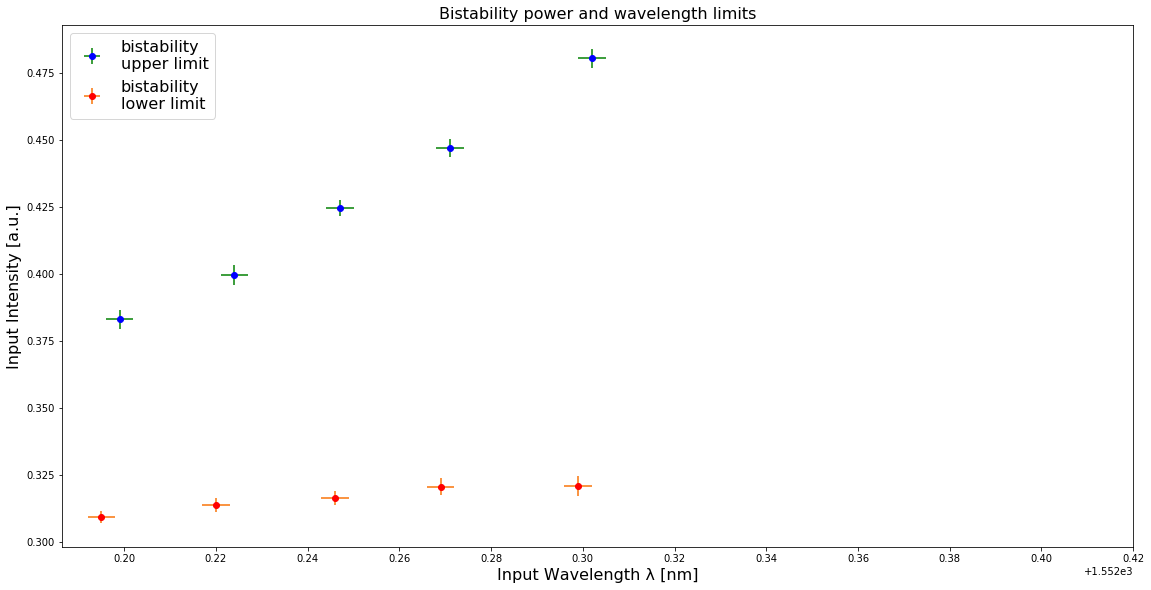

In [11]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

xmax = [lamd1[0][0] for ii, lamd1 in d1.items() if lamd1[0][6]]
xmin = [lamd1[0][0] for ii, lamd1 in d1.items() if not lamd1[0][6]]
xerr = 0.003

ymax    = [ np.mean(tt[0][tt[2], range(d1[ii][0][3])]) for ii, tt in t1.items() if d1[ii][0][6]]
ymaxerr = [  np.std(tt[0][tt[2], range(d1[ii][0][3])]) for ii, tt in t1.items() if d1[ii][0][6]]

ymin    = [ np.mean(tt[0][tt[2], range(d1[ii][0][3])]) for ii, tt in t1.items() if not d1[ii][0][6]]
yminerr = [  np.std(tt[0][tt[2], range(d1[ii][0][3])]) for ii, tt in t1.items() if not d1[ii][0][6]]

if xmax:
    ax1.errorbar(xmax, ymax, yerr=3*np.array(ymaxerr), xerr=xerr, fmt='o', c='b', ecolor='g', capthick=2,
                 label='bistability\nupper limit')
if xmin:
    ax1.errorbar(xmin, ymin, yerr=3*np.array(yminerr), xerr=xerr, fmt='o', c='r', ecolor='xkcd:orange', capthick=2,
                 label='bistability\nlower limit')

ax1.set_title(r'Bistability power and wavelength limits', fontsize = 16)
ax1.set_ylabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_xlabel('Input Wavelength λ [nm]', fontsize = 16)
ax1.legend(loc=2, fontsize=16)

plt.xticks( np.arange(1552.2,1552.42,0.02) )

plt.show()
plt.close()